In [1]:
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt

%matplotlib inline

## Load Population Data

In [2]:
populations = pd.read_csv(
    "../data/raw/population_ages.csv", thousands=",", index_col="OA11CD"
)
populations.columns = populations.columns.astype(int)
print("Nrows in population data", len(populations))
populations.head()

Nrows in population data 8802


,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
OA11CD,,,,,,,,,,,,,,,,,,,,,
E00041378,4,1,3,1,5,2,4,1,0,2,...,2,2,2,1,2,0,0,0,0,1
E00041381,1,2,2,2,3,0,0,4,4,4,...,1,0,0,0,0,1,0,0,1,0
E00041382,3,2,0,0,0,1,0,0,0,0,...,0,3,3,0,1,1,0,0,0,0
E00041383,1,3,1,5,3,3,3,2,3,1,...,3,1,2,3,3,0,0,0,0,1
E00041386,10,15,11,12,7,6,7,3,4,2,...,0,0,0,0,0,0,0,0,0,0


## Load OA Data

In [3]:
tyne_oa = gpd.read_file("../data/processed/tyne_oa")
tyne_oa.set_index("oa11cd", inplace=True)
print("Nrows in OA data:", len(tyne_oa))
tyne_oa.head()

Nrows in OA data: 952


,lad11cd,X,Y,Population,geometry
oa11cd,,,,,
E00042042,E08000021,421259.393,564639.754,310,"POLYGON ((421301.772 564928.429, 421301.755 56..."
E00042043,E08000021,420448.616,564819.213,304,"POLYGON ((420572.364 564892.821, 420572.312 56..."
E00042044,E08000021,420509.207,564622.209,246,"POLYGON ((420492.559 564780.806, 420492.590 56..."
E00042045,E08000021,421551.722,564088.460,201,"POLYGON ((421543.715 563955.116, 421542.251 56..."
E00042046,E08000021,422116.597,563648.529,424,"POLYGON ((422650.214 563568.422, 422650.020 56..."


## Filter Population Data

Only keep data for OAs in OA data.

In [4]:
print("Nrows before filtering:", len(populations))
populations = populations[populations.index.isin(tyne_oa.index)]
print("Nrows after filtering:", len(populations))

Nrows before filtering: 8802
Nrows after filtering: 952


## Give Weights to Different Ages

Text(0, 0.5, 'Weight')

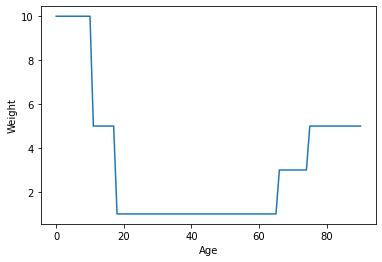

In [5]:
weights = pd.Series(1, index=populations.columns)

weights[weights.index < 18] = 5
weights[weights.index < 11] = 10
weights[weights.index > 65] = 3
weights[weights.index >= 75] = 5

weights.plot()
plt.xlabel("Age")
plt.ylabel("Weight")

## Apply Weights to OA Populations

In [6]:
oa_pop_weight_age = populations * weights
oa_pop_weight_age.head()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
OA11CD,,,,,,,,,,,,,,,,,,,,,
E00042044,30,50,0,10,20,10,50,30,20,20,...,15,5,5,5,10,0,5,5,0,5
E00042052,80,40,30,40,40,30,30,40,30,20,...,30,5,10,15,5,15,0,15,0,10
E00042054,70,70,30,30,30,80,30,70,50,20,...,5,15,5,5,0,0,10,5,0,5
E00042055,40,20,40,40,40,50,90,50,50,30,...,0,15,0,5,5,15,10,0,0,5
E00042058,20,10,40,10,30,0,10,20,30,30,...,5,5,0,0,0,5,0,0,0,5


## Calculate Normalised Weight for Each OA

<AxesSubplot:ylabel='Frequency'>

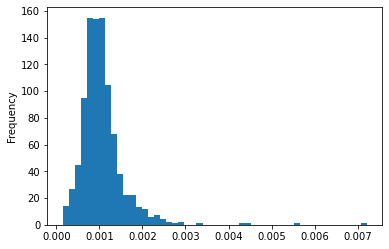

In [7]:
oa_pop_weight = oa_pop_weight_age.sum(axis=1)
oa_pop_weight = oa_pop_weight / oa_pop_weight.sum()

oa_pop_weight.plot.hist(bins=50)

Text(0, 0.5, 'OA Weight')

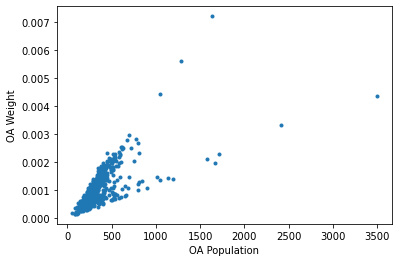

In [8]:
plt.plot(populations.sum(axis=1), oa_pop_weight, ".")
plt.xlabel("OA Population")
plt.ylabel("OA Weight")

Text(0.5, 1.0, 'E00175591')

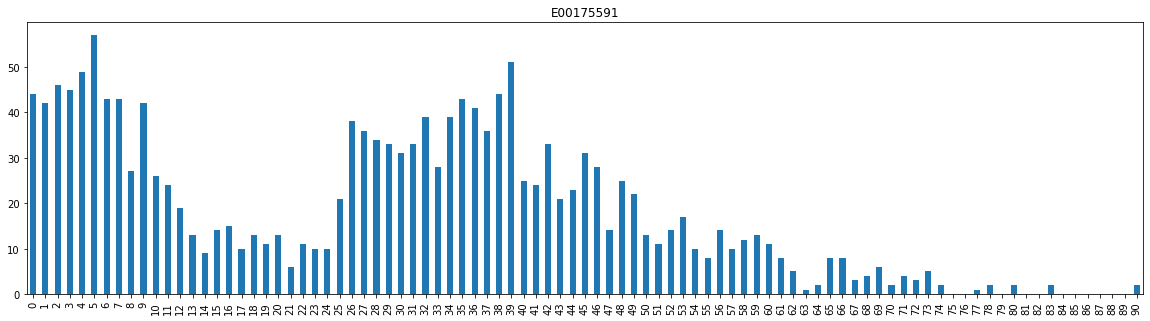

In [9]:
populations.loc[oa_pop_weight.idxmax()].plot.bar(figsize=(20, 5))
plt.title(oa_pop_weight.idxmax())

Text(0, 0.5, 'Rank Age-Weighted Population')

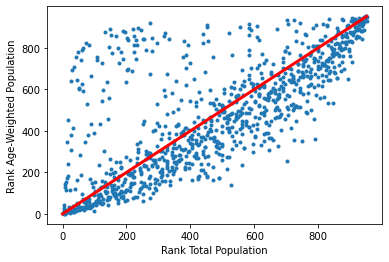

In [10]:
rank_totalpop = populations.sum(axis=1).rank(ascending=False)
rank_weightedpop = oa_pop_weight.rank(ascending=False)

ranks = pd.DataFrame({"poptotal": rank_totalpop, "popweighted": rank_weightedpop})


plt.plot(ranks["poptotal"], ranks["popweighted"], ".")
plt.plot(range(len(populations)), range(len(populations)), linewidth=3, color="r")
plt.xlabel("Rank Total Population")
plt.ylabel("Rank Age-Weighted Population")

In [11]:
print("Total population:")
display(populations.sum(axis=1).nlargest(10))

print("Age-Weighted population:")
display(oa_pop_weight.nlargest(10))

Total population:


OA11CD
E00042820    3492
E00042672    2408
E00042580    1707
E00175578    1662
E00175591    1638
E00042669    1576
E00175572    1285
E00175593    1191
E00175584    1141
E00042147    1048
dtype: int64

Age-Weighted population:


OA11CD
E00175591    0.007214
E00175572    0.005625
E00042147    0.004448
E00042820    0.004372
E00042672    0.003309
E00042262    0.002957
E00043549    0.002833
E00042280    0.002806
E00042877    0.002677
E00042081    0.002553
dtype: float64

## Load Place of Work Data

In [19]:
workplace = pd.read_csv("../data/raw/workplace.csv", index_col="oa11cd", thousands=",")
workplace = workplace["workers"]
workplace = workplace[workplace.index.isin(tyne_oa.index)]

workplace.head()

oa11cd
E00042067       5
E00042068     187
E00042082    1014
E00042083       7
E00042084      12
Name: workers, dtype: int64

150 OAs have weight > 0.001


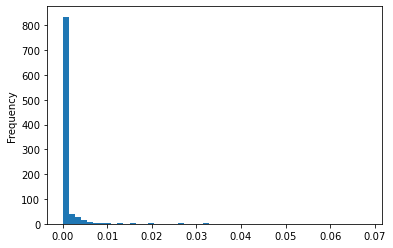

In [20]:
oa_work_weight = workplace / workplace.sum()

oa_work_weight.plot.hist(bins=50)
print((oa_work_weight > 0.001).sum(), "OAs have weight > 0.001")

Text(0, 0.5, 'Rank Workers')

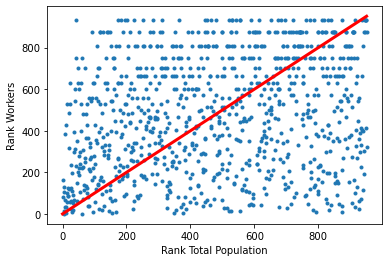

In [21]:
rank_workplace = oa_work_weight.rank(ascending=False)
ranks["workplace"] = rank_workplace

plt.plot(ranks["poptotal"], ranks["workplace"], ".")
plt.plot(range(len(populations)), range(len(populations)), linewidth=3, color="r")
plt.xlabel("Rank Total Population")
plt.ylabel("Rank Workers")

## Combine Weights

In [22]:
work_weight = 0.5
pop_weight = 0.5

oa_all_weights = pd.DataFrame(
    {"population": oa_pop_weight, "workplace": oa_work_weight}
)
oa_all_weights["total"] = (
    work_weight * oa_all_weights["workplace"]
    + pop_weight * oa_all_weights["population"]
)
oa_all_weights["total"] = oa_all_weights["total"] / oa_all_weights["total"].sum()

Text(0, 0.5, 'Rank Final Weight')

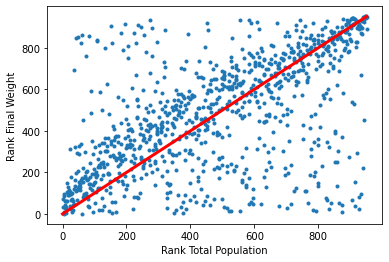

In [23]:
rank_weight = oa_all_weights["total"].rank(ascending=False)
ranks["total"] = rank_weight

plt.plot(ranks["poptotal"], ranks["total"], ".")
plt.plot(range(len(populations)), range(len(populations)), linewidth=3, color="r")
plt.xlabel("Rank Total Population")
plt.ylabel("Rank Final Weight")

## Plot

In [24]:
import contextily as ctx

tyne_oa["weight_total"] = oa_all_weights["total"]
tyne_oa["weight_population"] = oa_all_weights["population"]
tyne_oa["weight_workplace"] = oa_all_weights["workplace"]

density = False
if density:
    area = tyne_oa.geometry.area
    tyne_oa["weight_total"] = tyne_oa["weight_total"] / area
    tyne_oa["weight_population"] = tyne_oa["weight_population"] / area
    tyne_oa["weight_workplace"] = tyne_oa["weight_workplace"] / area

<ipython-input-25-9784c2d91a13>:5: FutureWarning: The "url" option is deprecated. Please use the "source" argument instead.
  ctx.add_basemap(ax,
<ipython-input-25-9784c2d91a13>:16: FutureWarning: The "url" option is deprecated. Please use the "source" argument instead.
  ctx.add_basemap(ax,
<ipython-input-25-9784c2d91a13>:27: FutureWarning: The "url" option is deprecated. Please use the "source" argument instead.
  ctx.add_basemap(ax,


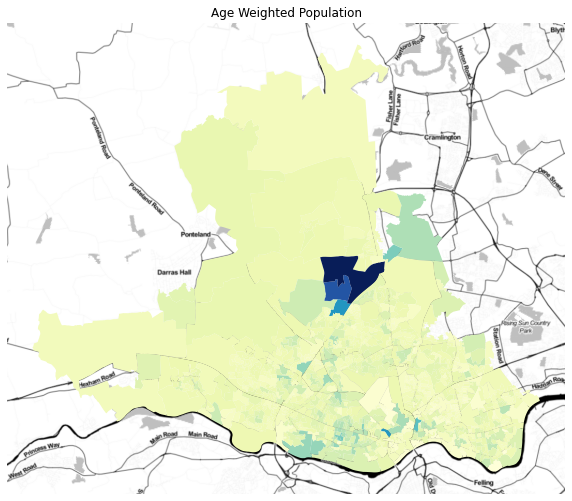

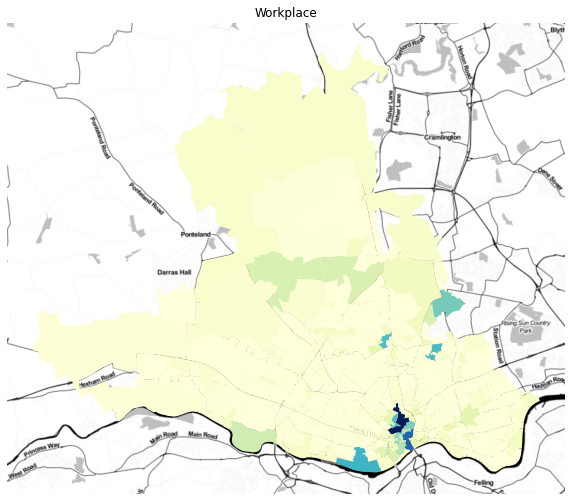

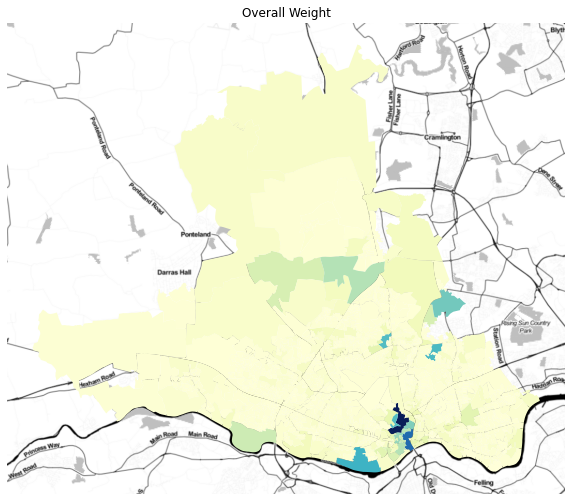

In [25]:
ax = tyne_oa.plot(column="weight_population", figsize=(10, 10), alpha=1, cmap="YlGnBu")

ctx.add_basemap(
    ax, url="http://a.tile.stamen.com/toner/{z}/{x}/{y}.png", crs=tyne_oa.crs
)
plt.title("Age Weighted Population")
ax.set_axis_off()


ax = tyne_oa.plot(
    column="weight_workplace", figsize=(10, 10), alpha=1, cmap="YlGnBu", legend=False
)

ctx.add_basemap(
    ax, url="http://a.tile.stamen.com/toner/{z}/{x}/{y}.png", crs=tyne_oa.crs
)
plt.title("Workplace")
ax.set_axis_off()


ax = tyne_oa.plot(
    column="weight_total", figsize=(10, 10), alpha=1, cmap="YlGnBu", legend=False
)

ctx.add_basemap(
    ax, url="http://a.tile.stamen.com/toner/{z}/{x}/{y}.png", crs=tyne_oa.crs
)
plt.title("Overall Weight")
ax.set_axis_off()